In [4]:
# Import packages
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
import pickle
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
plt.style.use('seaborn')

First train without the exog parameters.

In [5]:
# Load the data
pacific = pickle.load(open('./../Data/pacific_series.pickle', 'rb'))

# Pick 3 hurricanes at random
rand_hurricanes = np.random.randint(0, len(pacific), 3)
for i in rand_hurricanes:
    display(pacific[i])
    
p, q = 3, 2

,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 11,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS
25968,EP112014,KARINA,38.8,158.5,20,1014,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25969,20140812,1200,15.1,105.0,25,1008,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
25970,20140812,1800,15.8,106.4,25,1008,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
25971,20140813,0000,16.4,107.8,25,1007,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25972,20140813,0600,16.9,109.2,30,1006,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26026,20140826,1800,16.4,127.3,25,1005,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26027,20140827,0000,15.9,127.0,25,1005,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26028,20140827,0600,15.4,126.4,25,1005,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26029,20140827,1200,15.1,125.3,25,1006,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 11,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS
20627,EP042004,CELIA,26.9,127.3,15,1015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20628,20040719,0000,14.4,113.1,30,1008,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20629,20040719,0600,14.5,114.0,30,1008,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20630,20040719,1200,14.7,114.9,35,1005,60,50,50,60,...,0,0,0,0,0,0,0,0,0,1
20631,20040719,1800,14.9,115.7,45,1000,60,50,50,60,...,0,0,0,0,0,0,0,0,0,1
20632,20040720,0000,15.0,116.3,45,1000,70,50,50,70,...,0,0,0,0,0,0,0,0,0,1
20633,20040720,0600,15.2,116.9,45,1000,70,50,50,70,...,0,0,0,0,0,0,0,0,0,1
20634,20040720,1200,15.3,117.4,45,1000,70,50,20,70,...,0,0,0,0,0,0,0,0,0,1
20635,20040720,1800,15.5,118.0,50,997,70,50,20,70,...,0,0,0,0,0,0,0,0,0,1
20636,20040721,0000,15.9,118.7,50,997,70,50,20,70,...,0,0,0,0,0,0,0,0,0,1


,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 11,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS
23344,EP102009,GUILLERMO,15.9,171.1,25,1006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23345,20090812,0000,13.8,112.3,25,1009,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23346,20090812,0600,14.4,113.9,25,1008,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23347,20090812,1200,15.0,115.6,30,1006,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23348,20090812,1800,15.6,117.1,30,1005,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23349,20090813,0000,16.1,118.5,35,1004,75,75,0,60,...,0,0,0,0,0,0,0,0,0,1
23350,20090813,0600,16.5,119.9,45,999,75,75,30,60,...,0,0,0,0,0,0,0,0,0,1
23351,20090813,1200,16.8,121.2,55,994,90,90,45,60,...,0,0,0,0,0,0,0,0,0,1
23352,20090813,1800,17.0,122.5,60,992,90,90,60,60,...,0,0,0,0,0,0,0,0,0,1
23353,20090814,0000,17.2,123.8,60,992,90,75,60,60,...,0,0,0,0,0,0,0,0,0,1


Optimization terminated successfully.
         Current function value: -1.400186
         Iterations: 30
         Function evaluations: 9148


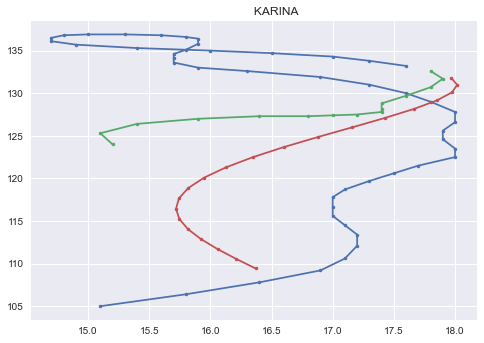

Optimization terminated successfully.
         Current function value: 7.333713
         Iterations: 76
         Function evaluations: 24287


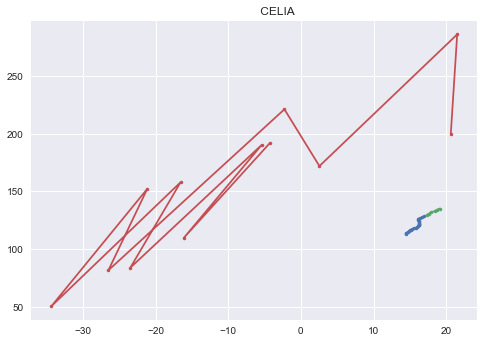

Optimization terminated successfully.
         Current function value: 5.202837
         Iterations: 97
         Function evaluations: 28839


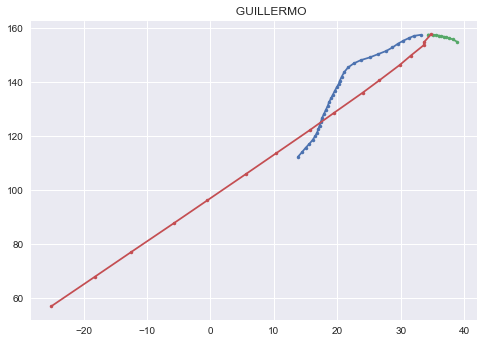

In [23]:
for i in rand_hurricanes:
    # Train on a single hurricane
    hurr = pacific[i].drop(columns=['Status DB',
       'Status EX', 'Status HU', 'Status LO', 'Status SD', 'Status SS',
       'Status TD', 'Status TS'])
    N = hurr.shape[0]
    cutoff = N//5*4
    X = hurr.iloc[1:cutoff, 4:6].to_numpy() # Train on 80% of the data
    y = hurr.iloc[1:cutoff, 2:4].to_numpy() # Train on 80% of the data
    y_test = hurr.iloc[cutoff:, 2:4].to_numpy()
    X_test = hurr.iloc[cutoff:, 4:6].to_numpy()
    model = VARMAX(y, order=(p, q)).fit(method='powell', maxiter=1000)
    pred = model.predict(start=cutoff, end=N+5)
    plt.plot(y[:, 0], y[:, 1], label='Observations', marker='.')
    plt.plot(y_test[:, 0], y_test[:, 1], label='True Trajectory', marker='.')
    plt.plot(pred[:, 0], pred[:, 1], label='Predicted Trajectory', marker='.')
    plt.title(hurr.iloc[0, 1])
    plt.show()

In [24]:
# Save the results of the hurricanes we want
hurr = pacific[rand_hurricanes[0]]
hurr_name = hurr.iloc[0, 1]
print(hurr_name)
stuff_dict = {}
stuff_dict['Hurricane Name'] = hurr_name
stuff_dict['Observed Points'] = y
stuff_dict['Used Parameters other than Long and Lat'] = False
stuff_dict['True Trajectory'] = y_test
stuff_dict['Predicted Trajectory'] = pred
stuff_dict['Model Parameters (p, q)'] = p, q
pickle.dump(stuff_dict, open(f'./../Data/NO_REG_VARMAX_{hurr_name}.pickle', 'wb'))

             KARINA


Train with the exog parameters now.

Optimization terminated successfully.
         Current function value: 0.253769
         Iterations: 155
         Function evaluations: 96447


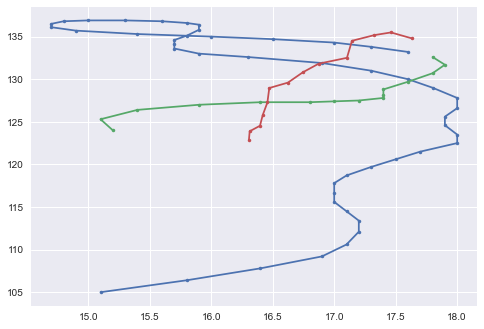

Optimization terminated successfully.
         Current function value: 0.165479
         Iterations: 137
         Function evaluations: 46770


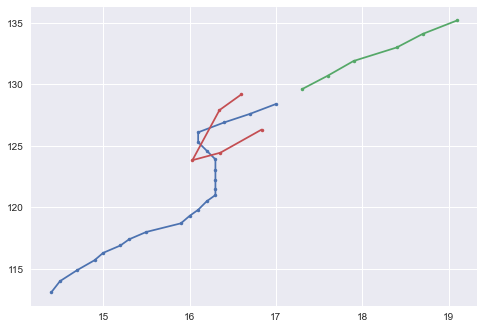

Optimization terminated successfully.
         Current function value: 1.364099
         Iterations: 86
         Function evaluations: 28249


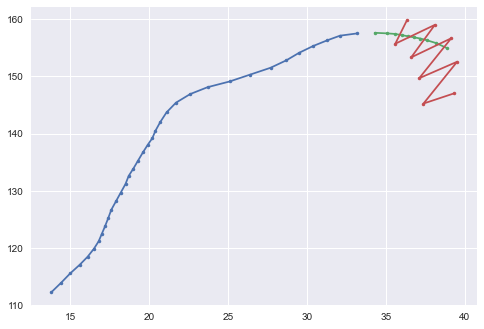

In [25]:
for i in rand_hurricanes:
    # Train on a single hurricane
    hurr = pacific[i].drop(columns=['Status DB',
       'Status EX', 'Status HU', 'Status LO', 'Status SD', 'Status SS',
       'Status TD', 'Status TS'])
    N = hurr.shape[0]
    cutoff = N//5*4
    X = hurr.iloc[1:cutoff, 4:6].to_numpy() # Train on 80% of the data
    y = hurr.iloc[1:cutoff, 2:4].to_numpy() # Train on 80% of the data
    y_test = hurr.iloc[cutoff:, 2:4].to_numpy()
    X_test = hurr.iloc[cutoff:, 4:6].to_numpy()
    model = VARMAX(y, X, order=(p, q)).fit(method='powell', maxiter=1000)
    pred = model.predict(exog=X_test, start=cutoff, end=cutoff+X_test.shape[0]-2)
    plt.plot(y[:, 0], y[:, 1], label='Observations', marker='.')
    plt.plot(y_test[:, 0], y_test[:, 1], label='True Trajectory', marker='.')
    plt.plot(pred[:, 0], pred[:, 1], label='Predicted Trajectory', marker='.')
    plt.show()

In [27]:
# Save the results of the hurricanes we want
hurr = pacific[rand_hurricanes[1]]
hurr_name = hurr.iloc[0, 1]
print(hurr_name)
stuff_dict = {}
stuff_dict['Hurricane Name'] = hurr_name
stuff_dict['Observed Points'] = y
stuff_dict['Used Parameters other than Long and Lat'] = True
stuff_dict['True Trajectory'] = y_test
stuff_dict['Predicted Trajectory'] = pred
stuff_dict['Model Parameters (p, q)'] = p, q
pickle.dump(stuff_dict, open(f'./../Data/REG_VARMAX_{hurr_name}.pickle', 'wb'))

              CELIA
